In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')

In [88]:
df=pd.read_csv('wines_SPA.csv')

In [89]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [90]:
df.shape

(7500, 11)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [92]:
df.isna().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [93]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


## Data Cleaning

In [94]:
import math
df['body'].fillna(df['body'].median(), inplace=True)
df['acidity'].fillna(df['acidity'].median(), inplace=True)

In [95]:
df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           545
body             0
acidity          0
dtype: int64

In [96]:
df.dropna(inplace=True)

In [97]:
df.isna().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

In [98]:
df.shape

(6953, 11)

In [99]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [100]:
df['winery'].nunique()

440

In [101]:
df['region'].nunique()

69

In [102]:
df['type'].nunique()

21

In [103]:
import numpy as np

df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['year'] = df['year'].astype('Int64')
df['year'].fillna(df['year'].median(), inplace=True)

In [104]:
df['year'] = 2024 - df['year']

In [105]:
df.year

0       11
1        6
2       15
3       25
4       28
        ..
7495     8
7496     6
7497     7
7498    13
7499     8
Name: year, Length: 6953, dtype: Int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6953 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6953 non-null   object 
 1   wine         6953 non-null   object 
 2   year         6953 non-null   Int64  
 3   rating       6953 non-null   float64
 4   num_reviews  6953 non-null   int64  
 5   country      6953 non-null   object 
 6   region       6953 non-null   object 
 7   price        6953 non-null   float64
 8   type         6953 non-null   object 
 9   body         6953 non-null   float64
 10  acidity      6953 non-null   float64
dtypes: Int64(1), float64(4), int64(1), object(5)
memory usage: 658.6+ KB


In [107]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':  
        df[column] = label_encoder.fit_transform(df[column])

In [108]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,385,691,11,4.9,58,0,64,995.00,19,5.0,3.0
1,30,743,6,4.9,31,0,67,313.50,18,4.0,2.0
2,409,709,15,4.8,1793,0,52,324.95,11,5.0,3.0
3,409,709,25,4.8,1705,0,52,692.96,11,5.0,3.0
4,409,709,28,4.8,1309,0,52,778.06,11,5.0,3.0


In [109]:
df.drop(columns=['country'],inplace=True)

## Correlation 

In [110]:
corr=df.corr()

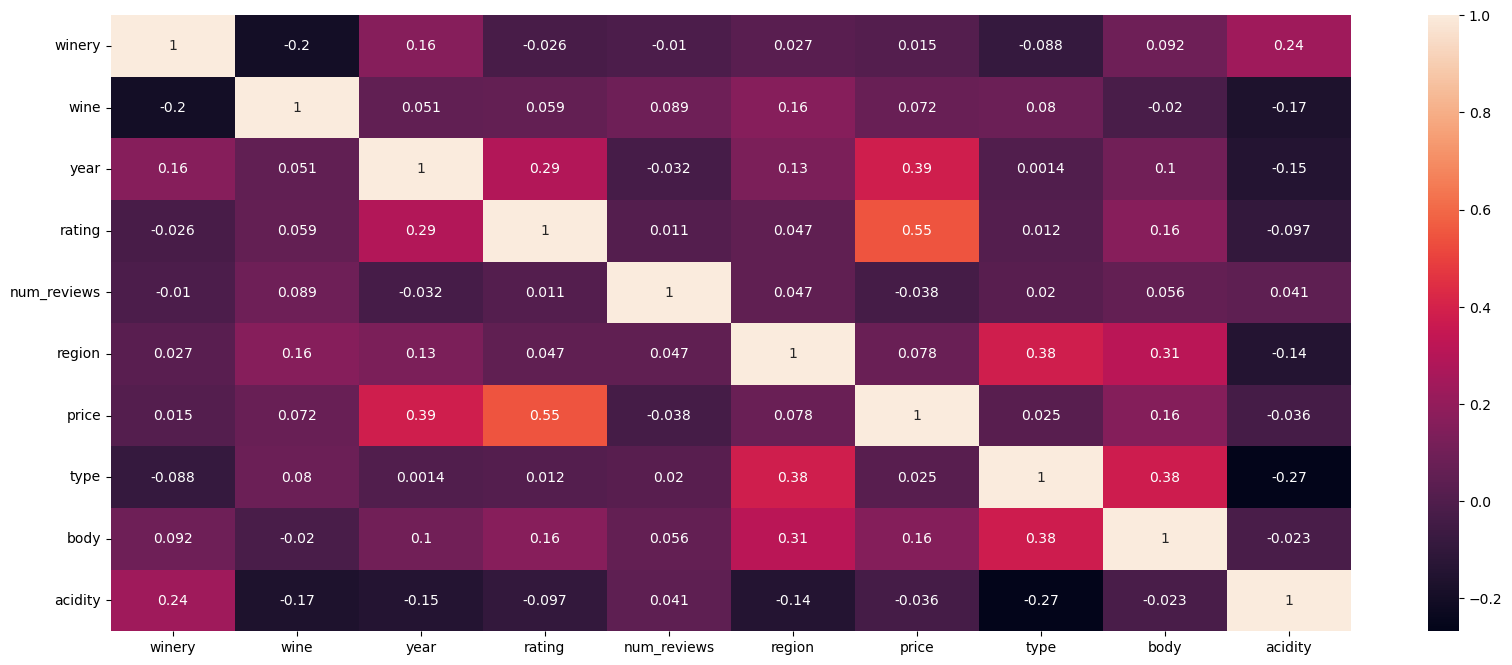

In [111]:
plt.figure(figsize=(20,8))
sn.heatmap(corr,annot=True)
plt.show()

In [112]:
df.drop(columns=['num_reviews'],inplace=True)

In [113]:
df.drop(columns=['winery'],inplace=True)

In [114]:
df.drop(columns=['region'],inplace=True)

In [115]:
df

,wine,year,rating,price,type,body,acidity
0,691,11,4.9,995.00,19,5.0,3.0
1,743,6,4.9,313.50,18,4.0,2.0
2,709,15,4.8,324.95,11,5.0,3.0
3,709,25,4.8,692.96,11,5.0,3.0
4,709,28,4.8,778.06,11,5.0,3.0
...,...,...,...,...,...,...,...
7495,561,8,4.2,19.98,12,4.0,3.0
7496,402,6,4.2,16.76,9,4.0,3.0
7497,283,7,4.2,24.45,10,4.0,3.0
7498,316,13,4.2,64.50,11,5.0,3.0


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

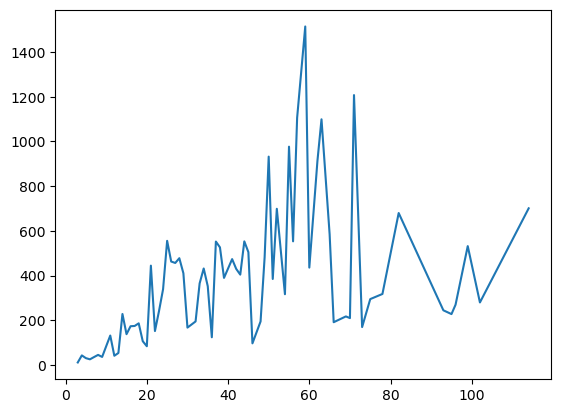

In [118]:
sn.lineplot(x=df.year, y=df.price)

plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Line Plot')

plt.show()

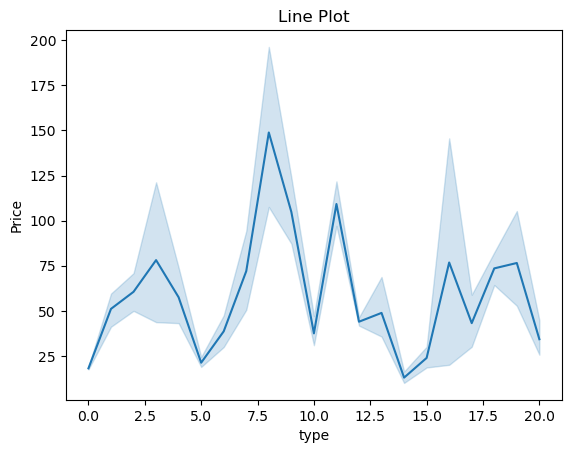

In [123]:
sn.lineplot(x=df.type, y=df.price)

plt.xlabel('type')
plt.ylabel('Price')
plt.title('Line Plot')

plt.show()

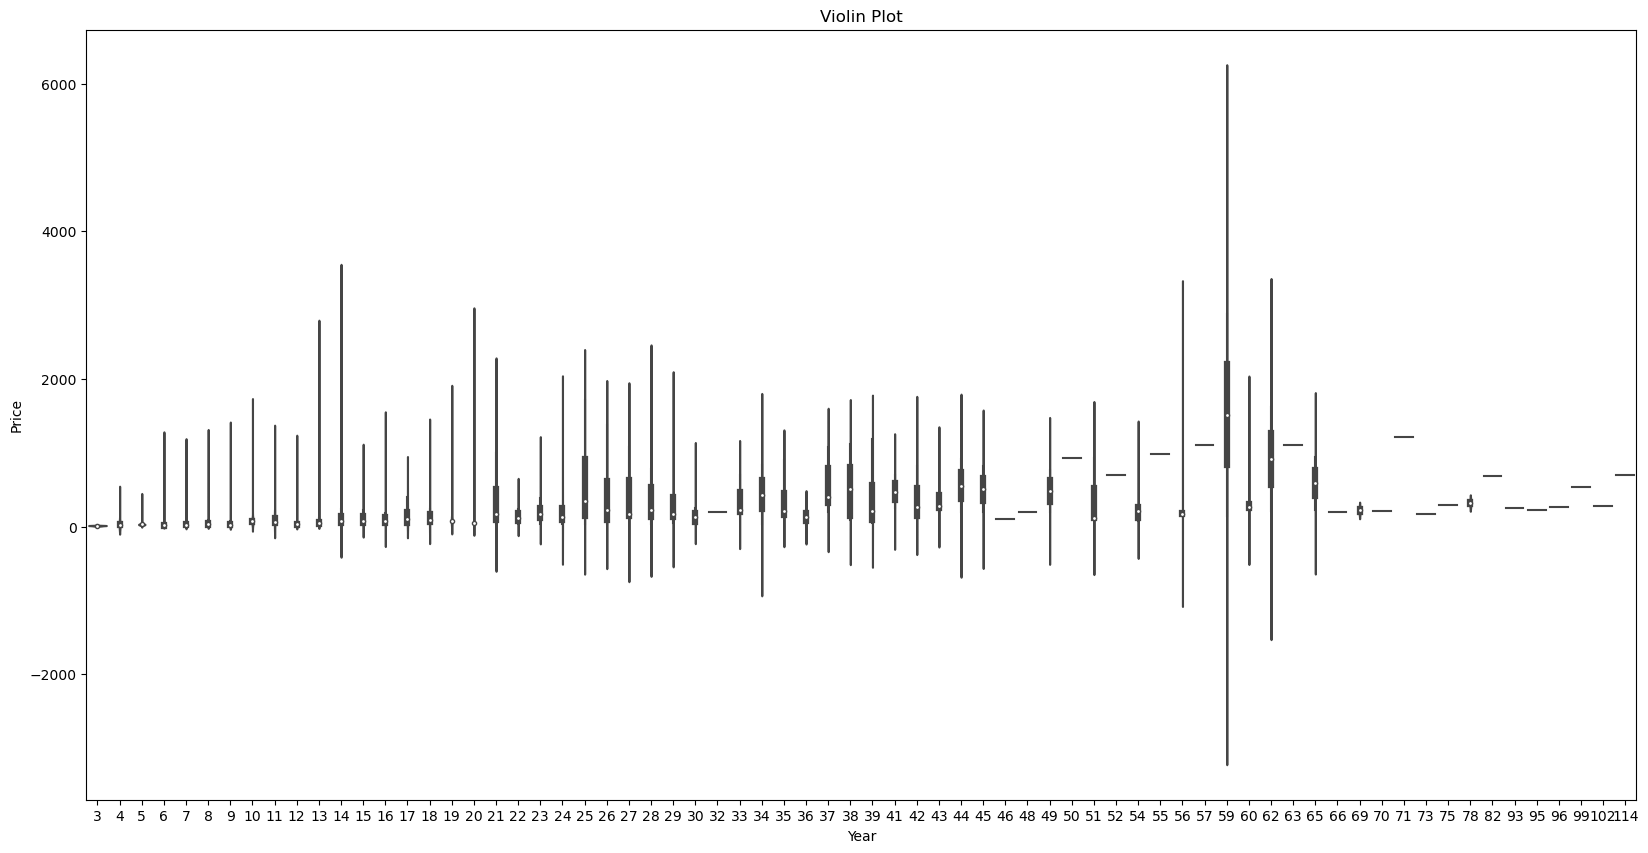

In [121]:
plt.figure(figsize=(20,10))
sn.violinplot(x='year', y='price', data=df)


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Violin Plot')

# Show the plot
plt.show()

In [ ]:
corr=df.corr()
plt.figure(figsize=(20,8))
sn.heatmap(corr,annot=True)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [45]:
df.isna().sum()

wine       0
year       0
rating     0
price      0
type       0
body       0
acidity    0
dtype: int64

In [46]:
column_to_exclude = 'price'

column_to_exclude_data = df[column_to_exclude]

data_subset = df.drop(columns=[column_to_exclude])

scaler = MinMaxScaler()

scaled_data_subset = scaler.fit_transform(data_subset)

scaled_data = pd.DataFrame(scaled_data_subset, columns=data_subset.columns, index=data_subset.index)
scaled_data[column_to_exclude] = column_to_exclude_data
scaled_data

,wine,year,rating,type,body,acidity,price
0,0.900913,0.072072,1.000000,0.95,1.000000,1.0,995.00
1,0.968709,0.027027,1.000000,0.90,0.666667,0.5,313.50
2,0.924381,0.108108,0.857143,0.55,1.000000,1.0,324.95
3,0.924381,0.198198,0.857143,0.55,1.000000,1.0,692.96
4,0.924381,0.225225,0.857143,0.55,1.000000,1.0,778.06
...,...,...,...,...,...,...,...
7495,0.731421,0.045045,0.000000,0.60,0.666667,1.0,19.98
7496,0.524120,0.027027,0.000000,0.45,0.666667,1.0,16.76
7497,0.368970,0.036036,0.000000,0.50,0.666667,1.0,24.45
7498,0.411995,0.090090,0.000000,0.55,1.000000,1.0,64.50


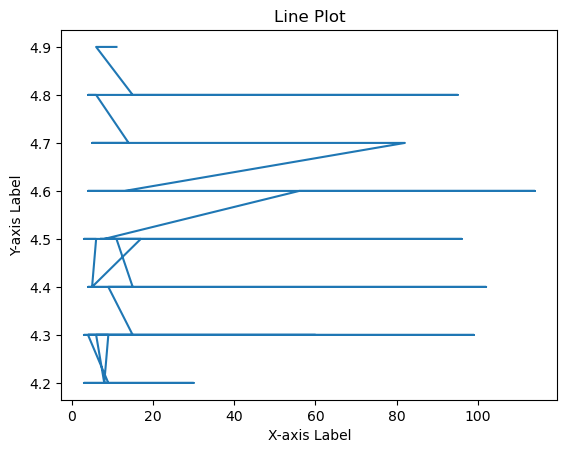

In [53]:
plt.plot(df['year'], df['rating'])

# Add labels and title
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot')

# Show the plot
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
X=scaled_data.drop(columns=['price'])
y=scaled_data['price']
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [49]:
pipelines={
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234)),
}

In [50]:
hyper_para_grid={
    'rf': {
    'randomforestregressor__n_estimators': [200,400],  
    'randomforestregressor__min_samples_split': [5, 10, 20, 50],  
    'randomforestregressor__min_samples_leaf': [4, 8, 16], 
}
,
    'gb':{
        'gradientboostingregressor__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
    }
}

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [ ]:
from sklearn.metrics import r2_score

fit_models={}
for algo,pipeline in pipelines.items():
    model = GridSearchCV(pipeline,hyper_para_grid[algo],cv=10,n_jobs=-1)
    try:
        print('Staring training for {}......'.format(algo))
        model.fit(X_train,y_train)
        fit_models[algo] = model
        y_pred=model.predict(x_test)
        r2 = r2_score(y_test, y_pred)
        print(r2)
        print('{} has been successfully fit!'.format(algo))
    except NotFittedError as e:
        print(repr(e))